#  Coursera Capstone 
###  IBM Applied Data Science Capstone
#  Opening a Falafel fast food restaurant in Berlin, Germany


---

## 1-	Introduction 
Vegetarian food becomes a habit for plenty of people, oriental cuisine is also a favorite one sense it serves many vegetarian dishes. For many people, Falafel sandwich or snack is  one of the favorite oriental vegetarian food in European countries like Germany.

In recent years, the country has embraced vegetarian and vegan cuisine, and today it is almost always possible to find several delicious vegetarian options on every restaurant menu.
se, as with any business decision, opening a new fast-food restaurant – even as small business - requires serious consideration and is a lot more complicated than it seems. Particularly, the location of the restaurant is one of the most important decisions that will determine whether it will be a success or a failure.(source: https://fearlessfemaletravels.com/eating-vegetarian-in-germany/)


"It's certainly fashionable. If you really want to be cool in Berlin, you've got to be vegan," Sebastian Joy of Vebu, Germany's largest vegetarian and vegan organization, told DW. (source: https://www.dw.com/en/berlin-vegan-capital-of-the-world/a-35951064-0)

So in Germany and especially in the multicultural Metropol Berlin such restaurants will be a good and profitable low cost business.



---

### Business Problem 
The objective of this capstone project is to analyze and select the best locations in the city of Berlin, Germany to open a new Falafel restaurant. Using data science methodology and machine learning techniques like clustering, this project aims to provide solutions to answer the business question: 
In the city of Berlin, if an investor is looking to open a new Falafel fast-food restaurant or even a series of restaurant with a special brand, where would you recommend that they open it?



---

## 2-	Data 
To solve the problem, we will need the following data: 
- • _List of neighborhoods in Berlin. This defines the scope of this project which is confined to the city of Berlin, the capital city of the country of Germany. 
- • _Latitude and longitude coordinates of those neighborhoods. This is required in order to plot the map and also to get the venue data. 
- • _Venue data, particularly data related to restaurants. We will use this data to perform clustering on the neighborhoods. 


---

## preparation

In [4]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert address into latitude and longitude

import requests
from pandas.io.json import json_normalize # transform JSON file int pandas dataframe

import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!confa install -c conda-forge folium =0.5.0 --yes
!pip -q install folium 
import folium # map rendering library
print ('Libraries imported')





Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

## Import DATA


In [5]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup



### get Boroughs and neighborhoods of Berlin

In [19]:
url = 'https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin'

response = requests.get(url)

soup = BeautifulSoup(response.text, "html.parser")
response.status_code

200

In [20]:
table= soup.find_all('table', class_= 'sortable wikitable')
#table

In [21]:
t_table = table[0] 
type(t_table)

bs4.element.Tag

In [22]:
for row in t_table.find_all('tr'):
    for cell in row.find_all('td'):
        cell.text
        #print(cell.text)

In [23]:
data = pd.read_html(url)
type(data)

list

In [24]:
berlin = data[0]
berlin

,Borough,Population 31 March 2010,Area in km²,Density per km²,Map
0,Charlottenburg-Wilmersdorf,319628,64.72,4878,NaN
1,Friedrichshain-Kreuzberg,268225,20.16,13187,NaN
2,Lichtenberg,259881,52.29,4952,NaN
3,Marzahn-Hellersdorf,248264,61.74,4046,NaN
4,Mitte,332919,39.47,8272,NaN
5,Neukölln,310283,44.93,6804,NaN
6,Pankow,366441,103.01,3476,NaN
7,Reinickendorf,240454,89.46,2712,NaN
8,Spandau,223962,91.91,2441,NaN
9,Steglitz-Zehlendorf,293989,102.50,2818,NaN


### Drop Map colomn

In [25]:
berlin.drop(['Map'], axis =1)

,Borough,Population 31 March 2010,Area in km²,Density per km²
0,Charlottenburg-Wilmersdorf,319628,64.72,4878
1,Friedrichshain-Kreuzberg,268225,20.16,13187
2,Lichtenberg,259881,52.29,4952
3,Marzahn-Hellersdorf,248264,61.74,4046
4,Mitte,332919,39.47,8272
5,Neukölln,310283,44.93,6804
6,Pankow,366441,103.01,3476
7,Reinickendorf,240454,89.46,2712
8,Spandau,223962,91.91,2441
9,Steglitz-Zehlendorf,293989,102.50,2818


In [26]:
berlin.to_csv('berlin.csv', index=False)

In [27]:
berlin.shape

(12, 5)

## Will get list of Boroughs from hier

In [28]:
url2 = 'https://de.wikipedia.org/wiki/Verwaltungsgliederung_Berlins'

response = requests.get(url2)

soup = BeautifulSoup(response.text, "html.parser")
response.status_code

200

In [29]:
table2= soup.find_all('table', class_= 'wikitable sortable zebra')


In [30]:
t_table2 = table2[1]
type(t_table2)

bs4.element.Tag

In [31]:
for row in t_table2.find_all('tr'):
    for cell in row.find_all('td'):
        cell.text
        #print(cell.text)
    

In [32]:
data2 = pd.read_html(url2)
type(data2)

list

In [33]:
berlin2 = data2[2]
berlin2

,Nr.,Ortsteil,Bezirk,Fläche(km²),Einwohner[2](30. Juni 2019),Einwohnerpro km²
0,101,Mitte,Mitte,1070,101.932,9526.000
1,102,Moabit,Mitte,772,79.512,10.299
2,103,Hansaviertel,Mitte,53,5.894,11.121
3,104,Tiergarten,Mitte,517,14.753,2854.000
4,105,Wedding,Mitte,923,86.688,9392.000
5,106,Gesundbrunnen,Mitte,613,95.393,15.562
6,201,Friedrichshain,Friedrichshain-Kreuzberg,978,134.900,13.793
7,202,Kreuzberg,Friedrichshain-Kreuzberg,1040,154.862,14.891
8,301,Prenzlauer Berg,Pankow,1100,164.593,14.963
9,302,Weißensee,Pankow,793,53.737,6776.000


#### Bezirk = borough, 
#### ortsteil =district

## Merging with geo-coordinates

In [34]:
!pip -q install geocoder

In [12]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3



## GET Coordinates 

In [6]:
from geopy.geocoders import Nominatim
import requests # HTTP library

In [7]:
CLIENT_ID = 'O3H4O=======' # your Foursquare ID
CLIENT_SECRET = '1GVZEO===' # your Foursquare Secret
VERSION = '20191201'
LIMIT = 100

address = "Brandenburg Gate,Berlin, Germany" # Brandenburg Gate is the hardt of Berlin

geolocator = Nominatim(user_agent="berlin_agent")
location = geolocator.geocode(address)
latitude =location.latitude    # location.latitude 
longitude =location.longitude  # location.longitude 

berlin='Brandenburg Gate location : {},{}'.format(latitude,longitude)
print(berlin)


Brandenburg Gate location : 52.51628045,13.3777018828817


## search for restaurants

In [8]:
#Quering for restaurant
search_query_fast = 'Fast Food Restaurant'
search_query = 'restaurant'
search_query_fast2 = 'Fastfood Restaurant'
radius = 10000
url_restaurant_fast = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query_fast, radius, LIMIT)

url_restaurant = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url_restaurant_fast2 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query_fast2, radius, LIMIT)

#url_restaurant


### Send the GET Request of restaurants and examine the results

In [9]:
results_restaurant = requests.get(url_restaurant).json()
results_restaurant_fast = requests.get(url_restaurant_fast).json()
results_restaurant_fast2 = requests.get(url_restaurant_fast2).json()

### Get relevant part of JSON and transform it into a pandas dataframe

In [10]:
# assign relevant part of JSON to venues
from pandas.io.json import json_normalize
venues_restaurant = results_restaurant['response']['venues']
venues_restaurant_fast = results_restaurant_fast['response']['venues']
# tranform venues into a dataframe and merging both data

dataframe_restaurant = json_normalize(venues_restaurant)
datafrane_restaurant_fast = json_normalize(venues_restaurant_fast)
dataframe = pd.concat([ dataframe_restaurant, datafrane_restaurant_fast])

print("There are {} restaurants at Berlin".format(dataframe.shape[0]))

There are 69 restaurants at Berlin


In [40]:
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d1d3941735', 'name': 'V...",False,4d30b1aca241f04d61efb627,Wilhelmstr. 77,DE,Berlin,Deutschland,Behrenstr.,318,"[Wilhelmstr. 77 (Behrenstr.), 10117 Berlin, De...","[{'label': 'display', 'lat': 52.51467966064701...",52.514680,13.381596,NaN,10117,Berlin,Samadhi Vegetarisches Restaurant,v-1575145238,531566796
1,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",False,4adcda88f964a520574921e3,Unter den Linden 77,DE,Berlin,Deutschland,Pariser Platz,152,"[Unter den Linden 77 (Pariser Platz), 10117 Be...","[{'label': 'display', 'lat': 52.51601581545151...",52.516016,13.379910,NaN,10117,Berlin,Restaurant Quarré,v-1575145238,126425485
2,"[{'id': '4bf58dd8d48988d10d941735', 'name': 'G...",False,4d02bf527ee8a090b5b7ef54,Leipziger Str. 65,DE,Berlin,Deutschland,NaN,1216,"[Leipziger Str. 65, 10117 Berlin, Deutschland]","[{'label': 'display', 'lat': 52.51113856236952...",52.511139,13.393546,NaN,10117,Berlin,Restaurant Löwenbräu am Gendarmenmarkt,v-1575145238,NaN
3,"[{'id': '4bf58dd8d48988d10d941735', 'name': 'G...",False,4adcda88f964a5207c4921e3,Platz der Republik 1,DE,Berlin,Deutschland,Im Deutschen Bundestag,282,[Platz der Republik 1 (Im Deutschen Bundestag)...,"[{'label': 'display', 'lat': 52.5186283, 'lng'...",52.518628,13.376118,NaN,11011,Berlin,Dachgarten-Restaurant,v-1575145238,453784891
4,"[{'id': '4bf58dd8d48988d10c941735', 'name': 'F...",False,5aa6c6c6a22db77cd6ff85bd,Mittelstr. 30,DE,Berlin,Deutschland,Neustädtischer Kirchplatz,499,"[Mittelstr. 30 (Neustädtischer Kirchplatz), 10...","[{'label': 'display', 'lat': 52.51797507680307...",52.517975,13.384530,NaN,10117,Berlin,Restaurant 1687,v-1575145238,NaN


In [41]:
dataframe.shape

(69, 19)

### Define information of interest and filter dataframe

In [11]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

    
# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

  
# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

#dataframe_filtered
rest_df=dataframe_filtered[['name','categories','distance','lat','lng','id']]


# save to file
rest_df.to_csv('rest_df', index=False)
rest_df.head()

,name,categories,distance,lat,lng,id
0,Restaurant Quarré,Restaurant,152,52.516016,13.379910,4adcda88f964a520574921e3
1,Samadhi Vegetarisches Restaurant,Vegetarian / Vegan Restaurant,318,52.514680,13.381596,4d30b1aca241f04d61efb627
2,Restaurant 1687,French Restaurant,499,52.517975,13.384530,5aa6c6c6a22db77cd6ff85bd
3,Restaurant Löwenbräu am Gendarmenmarkt,German Restaurant,1216,52.511139,13.393546,4d02bf527ee8a090b5b7ef54
4,Dachgarten-Restaurant,German Restaurant,282,52.518628,13.376118,4adcda88f964a5207c4921e3


## Location of Restaurants

In [79]:
restaurants_map = folium.Map(location=[latitude, longitude], zoom_start=14) # generate map centred around Brandenburger Tor

# add a red circle marker to represent the core location of Berlin
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Brandenburger Tor',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.7
).add_to(restaurants_map)
    

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(rest_df.lat, rest_df.lng, rest_df.name):
    folium.features.Marker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(restaurants_map)

# display map
restaurants_map

## Methodology section
### How Far are Restaurants from the core location

In [13]:
from bs4 import BeautifulSoup # scraping library

import json # JSON files manipulation

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

#!conda install -c conda-forge folium=0.5.0 --yes
#!pip -q install folium 
import folium # map rendering library

print("*********   Loaded library     ***********")

*********   Loaded library     ***********


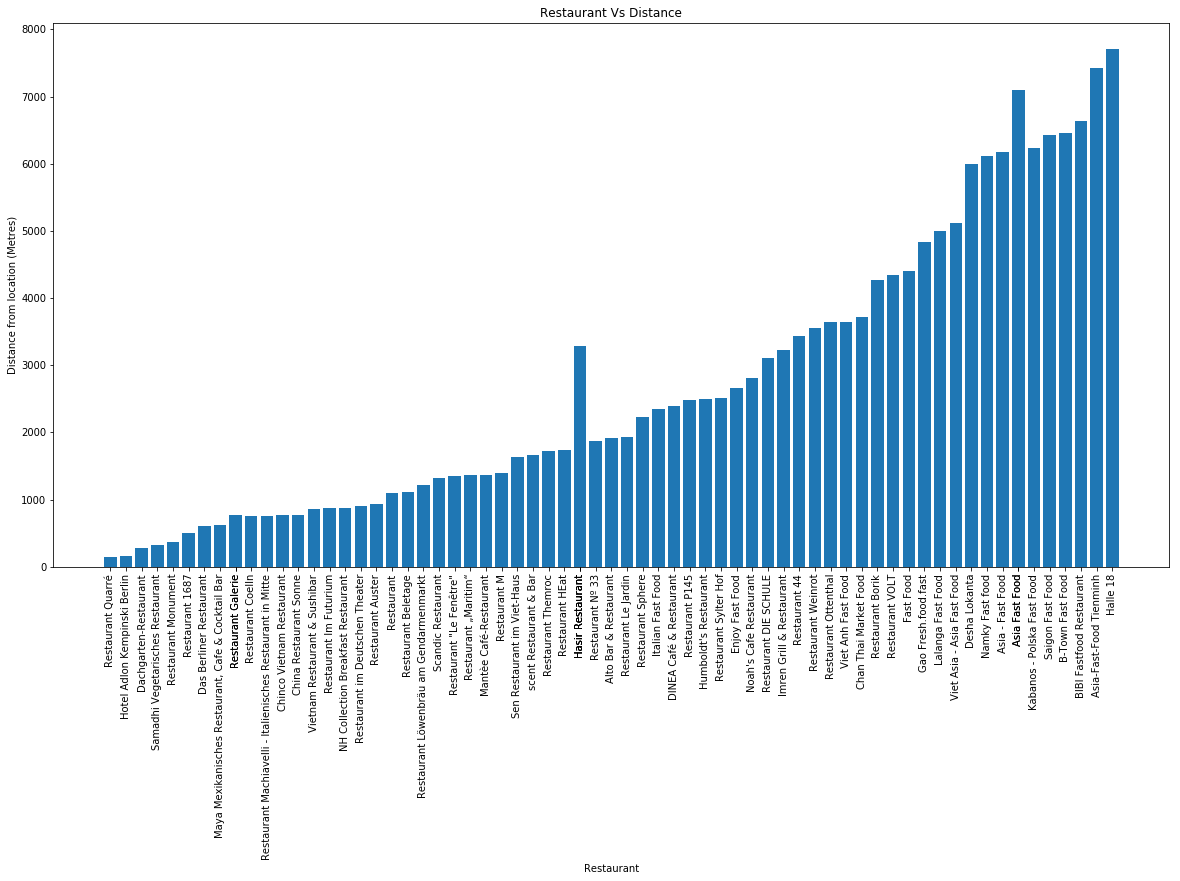

Average distance between Restaurants and core location is 2711 metres


In [14]:

distance_rest_df=dataframe_filtered[['name','categories','distance','lat','lng']].sort_values('distance')

def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(distance_rest_df.name))
    plt.figure(figsize=(20,10))
    plt.bar(distance_rest_df.name, distance_rest_df.distance)
    
    plt.xlabel('Restaurant')
    plt.ylabel('Distance from location (Metres)')
    plt.xticks(distance_rest_df.name,rotation=90)
    plt.title('Restaurant Vs Distance')
    plt.show()
plot_bar_x()

print("Average distance between Restaurants and core location is {} metres".format(int(sum(rest_df['distance'])/rest_df.shape[0])))

### Explore for other venues around Brandenburger Tor in Berlin
A tourist always wants to visit nearby iconic places.So he wants to reside somewhere nearby to all major venues.We will be exploring more venues around the core location.We will be digging more on main areas or place around 1 km.

In [15]:
radius=1000
url_venues = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
#url_venues

In [16]:
import requests

results_venues = requests.get(url_venues).json()
'There are {} venues around Brandenburger Tor in Berlin.'.format(len(results_venues['response']['groups'][0]['items']))


'There are 100 venues around Brandenburger Tor in Berlin.'

Get relevant part of JSON and transform it into a pandas dataframe

In [17]:
items_venues = results_venues['response']['groups'][0]['items']
#items_venues[0]

In [18]:
dataframe_venues = json_normalize(items_venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe_venues.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered_venues = dataframe_venues.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered_venues['venue.categories'] = dataframe_filtered_venues.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered_venues.columns = [col.split('.')[-1] for col in dataframe_filtered_venues.columns]

#dataframe_filtered_venues.name

### Extract Venues using Search Queries



When I searched in google map,I could see there were some venues missing.Temples,Church,Parks and Museums are also more recognized by visitors and local audience.So lets bring their data inside.I am not sure why Foursquare hasnt captured it while trying venue query.

Below is the function to extract many queries at a time by passing them in a single list.


In [19]:
#search query function
search_query_list = ['temple','church','palace','museum'] 
radius =1000
temp_df=[]
search_df=[]

def search_query_fn():   
    #Loop to run through urls and from json to pandas
    for i in range(len(search_query_list)):
        url= 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query_list[i], radius, LIMIT)
        
        results=requests.get(url).json()
        venues = results['response']['venues']
        
        #Normalize from json
        dataframe = json_normalize(venues)
        
        #Removing unwanted column headers
        dataframe.columns = [col.split('location.')[-1] for col in dataframe.columns]
        temp_df.append(dataframe)
    
    #Loop to append dataframes to single dataframe
    for j in range(len(search_query_list)):
        data=temp_df[j]
        search_df.append(data)

# Function to run loop over queries
search_query_fn()


search_df = pd.concat(search_df,sort=True)
search_df['categories'] = search_df.apply(get_category_type, axis=1)
search_df = pd.DataFrame(search_df[['name','categories','distance','formattedAddress','postalCode','lat','lng','id']])


search_df

,name,categories,distance,formattedAddress,postalCode,lat,lng,id
0,Wandering Church by Juan Garaizabal,Art Gallery,1087,"[Bethlehemkirchplatz, 10117 Berlin, Deutschland]",10117,52.509208,13.388772,4fcf37e310813a71e8813bba
0,The Unicorn Palace,Office,245,"[Wilhelmstr. 68 (Dorotheenstraße), 11011 Berli...",11011,52.518365,13.378902,530cd414498e065f2e8693aa
1,Tränenpalast,Historic Site,818,"[Reichstagufer 17, 10117 Berlin, Deutschland]",10117,52.520854,13.387162,4cc9350ed147a09328aee5ae
0,Museum für Kommunikation,Science Museum,959,"[Leipziger Str. 16 (Mauerstr.), 10117 Berlin, ...",10117,52.509822,13.387077,4adcda81f964a5207d4821e3
1,Musikinstrumenten Museum,Museum,798,"[Tiergartenstr. 1 (Ben-Gurion-Str.), 10785 Ber...",10785,52.510501,13.370726,4adcda81f964a5207c4821e3
2,Deutsche Kinemathek - Museum für Film und Fern...,Museum,785,"[Potsdamer Str. 2, 10785 Berlin, Deutschland]",10785,52.509695,13.373552,4bf2ce35e5eba5930fd21d90
3,Brandenburger Tor Museum,Museum,159,"[Pariser Platz 4A, Berlin, Deutschland]",NaN,52.516724,13.379934,59eefb25d3cce84392c1ef41
4,Museumsshop,Gift Shop,808,[Potsdamer Str. 2 (Deutsche Kinemathek Museum ...,10785,52.509443,13.373666,526f8c3f498eb4538f017f25
5,Historiale Berlin Museum,History Museum,564,"[Unter den Linden 40, 10117 Berlin, Deutschland]",10117,52.516913,13.385973,4d6cd738125eb60c2e322c4e
6,Topographie des Terrors,History Museum,1119,"[Niederkirchnerstr. 8 (Wilhelmstr.), 10963 Ber...",10963,52.506884,13.383601,4adcda83f964a520944821e3


In [20]:
# save to file
search_df.to_csv('search_df', index = False)


### We will collate venues provided by foursquare and the ones extracted through hitting search query API

In [21]:
# Data extracted from foursquare venues
four_sq_venue=pd.DataFrame(dataframe_filtered_venues[['name','categories','distance','lat','lng','id']])

# Data extracted from search queries
new_venues=pd.DataFrame(search_df)

# Concatenate both dataframe
df_venue=pd.concat([four_sq_venue, new_venues],sort=True)




### Let us remove hotels & restaurants and get final list of venues

In [22]:

to_drop = ['Hotel', 'Restautant','hotel','Resort', 'Imbiz', 'Fastfood', 'Fast Food','Ristorante', 'Bar' 'Café','Beef', 'Caffè', 'Grill' ]
df_venues = df_venue[~df_venue['name'].str.contains('|'.join(to_drop))].reset_index()
print("There are {} venues in Berlin Miite".format(df_venues.shape[0]))
df_venues[['name','categories','distance','id']]

There are 109 venues in Berlin Miite


,name,categories,distance,id
0,Brandenburger Tor,Monument / Landmark,6,4adcda7cf964a520524721e3
1,India Club,Indian Restaurant,214,58f3ad1435f983278e8dc6cb
2,Adlon Spa by Resense,Spa,191,4adcda92f964a5200a4c21e3
3,Pariser Platz,Plaza,192,4adcda7ff964a520f34721e3
4,Купол Pейхстага (Reichstagskuppel),Scenic Lookout,274,4c99d25c292a6dcb0c45c976
5,Butter Lindner,Gourmet Shop,257,4baa0944f964a52086453ae3
6,Reichstag,Capitol Building,271,4b0abfeaf964a520462723e3
7,Denkmal für die ermordeten Juden Europas,Monument / Landmark,274,4b10f428f964a520f77623e3
8,Akademie der Künste,Art Gallery,143,4b66f1e2f964a52093312be3
9,Sra Bua by Tim Raue,Asian Restaurant,262,51685066498e9cc131f19087


In [23]:
# save to file
df_venues.to_csv('df_venues', index = False)


### Location of all venues

In [78]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=14) # generate map centred around Brandenburger Tor

# add a red circle marker to represent Berlin
folium.CircleMarker(
    [latitude, longitude],
    radius=15,
    color='red',
    popup='Berlin',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.9
).add_to(venues_map)


# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(df_venues.lat, df_venues.lng, df_venues.name):
    folium.features.Marker(
        [lat, lng],
        radius=5,
        color='black',
        #popup=label,
        fill = True,
        fill_color='black',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

###  How far are venues from the core location?


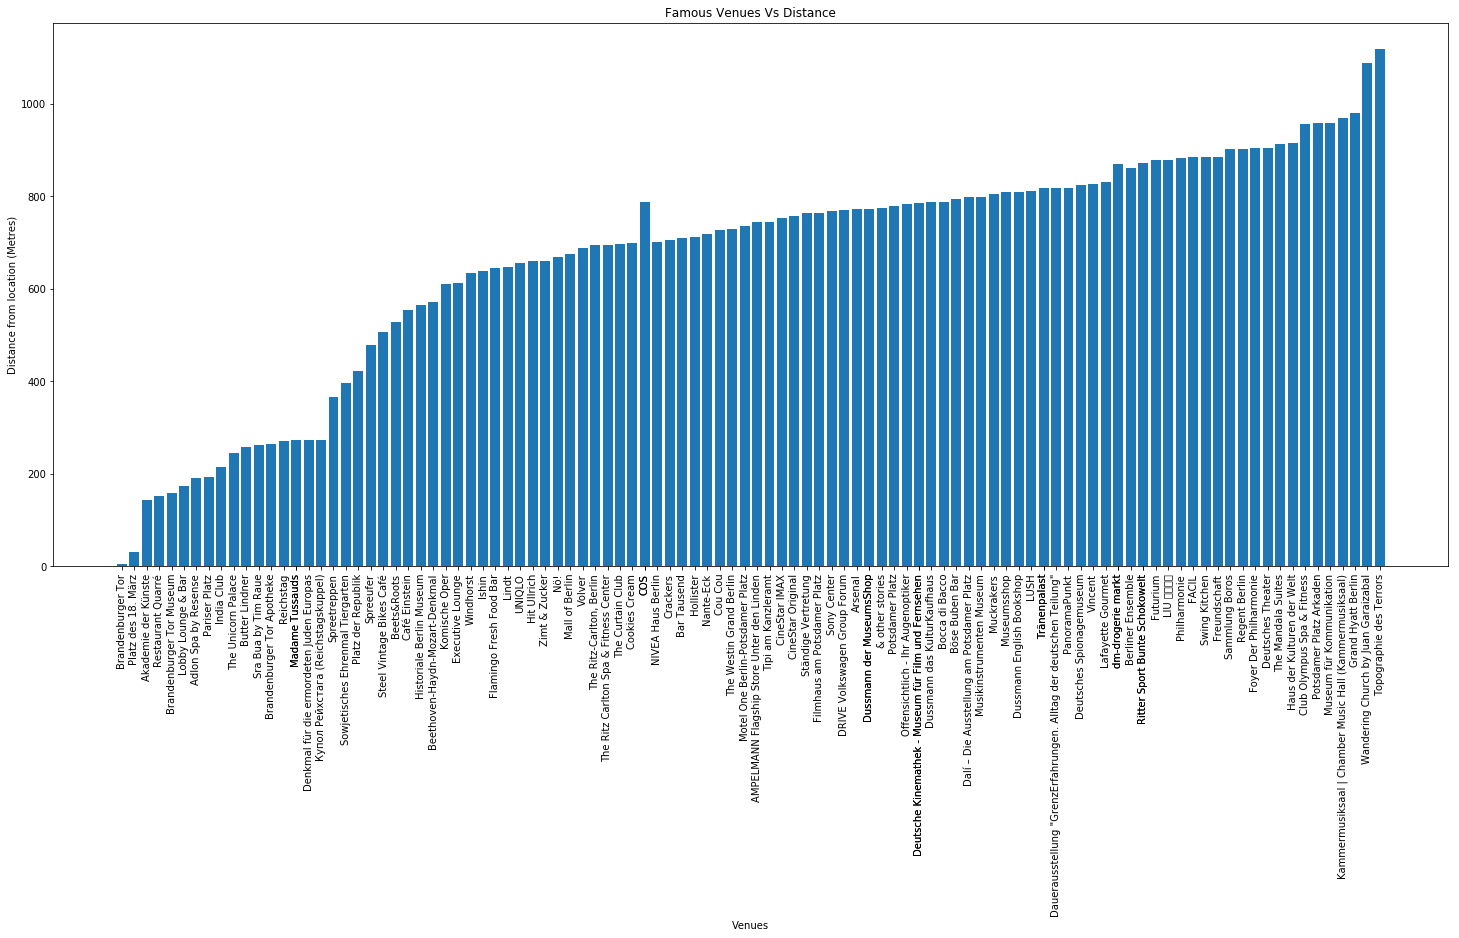

In [25]:
distance_venues_df=df_venues.sort_values('distance')

def plot_bar_venue():
    # this is for plotting purpose
    index = np.arange(len(distance_venues_df.name))
    plt.figure(figsize=(25,10))
    plt.bar(distance_venues_df.name, distance_venues_df.distance)
    plt.xlabel('Venues')
    plt.ylabel('Distance from location (Metres)')
    plt.xticks(distance_venues_df.name,rotation=90)
    plt.title('Famous Venues Vs Distance')
    plt.show()
plot_bar_venue()


### Venue Categories

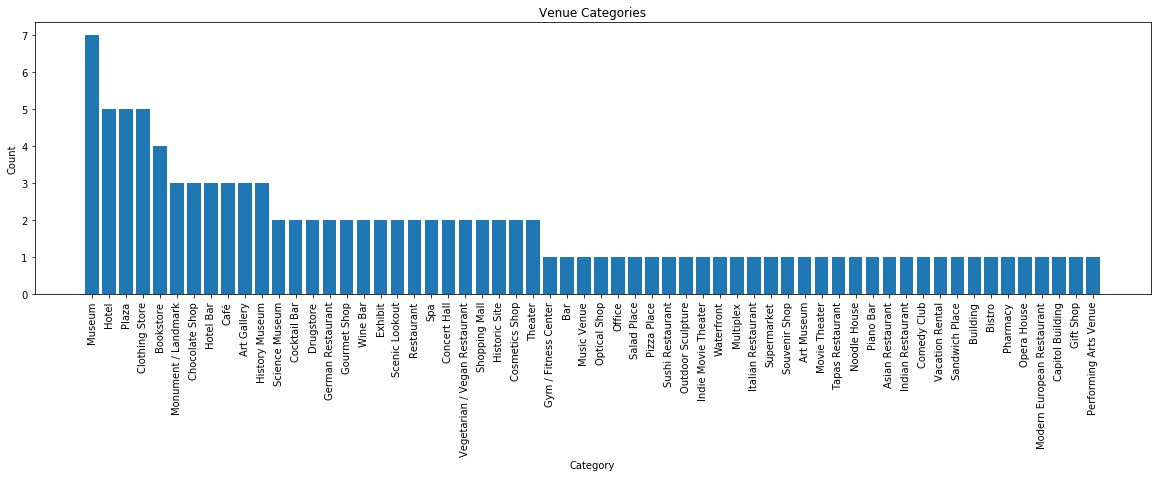

In [26]:
freq_venue=df_venues['categories'].value_counts()
freq_venue=pd.DataFrame(freq_venue).reset_index()
freq_venue.columns=['Category','Count']
freq_venue

def plot_bar_categ():
    # this is for plotting purpose
    index = np.arange(len(freq_venue.Category))
    plt.figure(figsize=(20,5))
    plt.bar(freq_venue.Category, freq_venue.Count)
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(freq_venue.Category,rotation=90)
    plt.title('Venue Categories')
    plt.show()
plot_bar_categ()

###  Rating of all Venues

#### try with new account to get results!

In [47]:
# new credientials


In [48]:
#Rating of venues
rating_df=[]

for k in range(df_venues.shape[0]):
    venue_id=df_venues.id[k]
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID3, CLIENT_SECRET3, VERSION3)
    result = requests.get(url).json()
    #print(result)
    try:
        #print(df_venues.name[k],result['response']['venue']['rating'])
        rating=result['response']['venue']['rating']
        rating_df.append(rating)
        
    except:
        #print(df_venues.name[k],'This venue has not been rated yet.')
        rating='No Rating Yet'
        rating_df.append(rating)


In [49]:
rate_dict = {'Venue': df_venues.name, 'Rating': rating_df,'distance':df_venues.distance}
rate_df=pd.DataFrame(rate_dict)
rate_df

,Venue,Rating,distance
0,Brandenburger Tor,9.4,6
1,India Club,8.8,214
2,Adlon Spa by Resense,8.7,191
3,Pariser Platz,8.7,192
4,Купол Pейхстага (Reichstagskuppel),9.4,274
5,Butter Lindner,8.9,257
6,Reichstag,9,271
7,Denkmal für die ermordeten Juden Europas,8.9,274
8,Akademie der Künste,8.2,143
9,Sra Bua by Tim Raue,8.1,262


In [50]:
rate_df.to_csv('rate_df.csv' ,index=False )

### Number of Tips for all Venues

In [32]:
# new credientials


In [33]:
tips_df=[]

for k in range(df_venues.shape[0]):
    venue_id=df_venues.id[k]
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID2, CLIENT_SECRET2, VERSION2)
    result = requests.get(url).json()
    
    try:
        #print(result['response']['venue']['tips']['count'],result['response']['venue'])
        tips=result['response']['venue']['tips']['count']
        tips_df.append(tips)
        
    except:
        #print(df_venues.name[k],'This venue has not been rated yet.')
        tips='No Tips'
        tips_df.append(tips)



In [82]:
tips_df=[]

for k in range(df_venues.shape[0]):
    venue_id=df_venues.id[k]
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID2, CLIENT_SECRET2, VERSION2)
    result = requests.get(url).json()
result
    #print(result['response']['venue']['tips']['count'],result['response']['venue'])
    #tips=result['response']['venue']['tips']['count']
    #tips_df.append(tips)

{'meta': {'code': 429,
  'errorType': 'quota_exceeded',
  'errorDetail': 'Quota exceeded',
  'requestId': '5de2d81d95feaf001bb2fe24'},
 'response': {}}

In [38]:
tips_dict = {'Venue': df_venues.name, 'Tips': tips_df,'distance':df_venues.distance}
tips=pd.DataFrame(tips_dict)
#tips=tips.sort_values('Tips',ascending = False)

tips



,Venue,Tips,distance
0,Brandenburger Tor,511,6
1,India Club,16,214
2,Adlon Spa by Resense,4,191
3,Pariser Platz,60,192
4,Купол Pейхстага (Reichstagskuppel),134,274
5,Butter Lindner,2,257
6,Reichstag,408,271
7,Denkmal für die ermordeten Juden Europas,326,274
8,Akademie der Künste,5,143
9,Sra Bua by Tim Raue,16,262


In [39]:
tips.to_csv('tips.csv', index = False)

---

###  Extracting Rated and Tips Venues

In [51]:
# Add Tips column to Rating Dataframe
rate_df['Tips']=tips['Tips']

#Lets take values of only rated venues
only_rated_tips = rate_df[(rate_df['Rating']!='No Rating Yet') | (rate_df['Tips']!=0)]

only_rated_tips.reset_index(inplace = True,drop = True) 
only_rated_tips



,Venue,Rating,distance,Tips
0,Brandenburger Tor,9.4,6,511
1,India Club,8.8,214,16
2,Adlon Spa by Resense,8.7,191,4
3,Pariser Platz,8.7,192,60
4,Купол Pейхстага (Reichstagskuppel),9.4,274,134
5,Butter Lindner,8.9,257,2
6,Reichstag,9,271,408
7,Denkmal für die ermordeten Juden Europas,8.9,274,326
8,Akademie der Künste,8.2,143,5
9,Sra Bua by Tim Raue,8.1,262,16


In [52]:
only_rated_tips.to_csv('only_rated_tips', index=False)

### Final list of Venues

In [57]:
rated_list=[]
for i in range(len(only_rated_tips)):
    rated_tip_temp=only_rated_tips['Venue'][i]
    rated_list.append(rated_tip_temp)

#Masking all values present in list
mask = df_venues['name'].isin(rated_list)

final_ven = df_venues[mask]
#final_venues['location']=final_venues['lat'].astype(str).str.cat(final_venues['lng'].astype(str), sep=' - ')
final_ven.reset_index(inplace = True,drop = True) 

final_ven

,index,categories,distance,formattedAddress,id,lat,lng,name,postalCode
0,0,Monument / Landmark,6,NaN,4adcda7cf964a520524721e3,52.516247,13.377786,Brandenburger Tor,NaN
1,2,Indian Restaurant,214,NaN,58f3ad1435f983278e8dc6cb,52.514835,13.379804,India Club,NaN
2,3,Spa,191,NaN,4adcda92f964a5200a4c21e3,52.515823,13.380434,Adlon Spa by Resense,NaN
3,4,Plaza,192,NaN,4adcda7ff964a520f34721e3,52.515292,13.380042,Pariser Platz,NaN
4,5,Scenic Lookout,274,NaN,4c99d25c292a6dcb0c45c976,52.518549,13.376099,Купол Pейхстага (Reichstagskuppel),NaN
5,6,Gourmet Shop,257,NaN,4baa0944f964a52086453ae3,52.517879,13.380450,Butter Lindner,NaN
6,7,Capitol Building,271,NaN,4b0abfeaf964a520462723e3,52.518503,13.376062,Reichstag,NaN
7,8,Monument / Landmark,274,NaN,4b10f428f964a520f77623e3,52.513866,13.378546,Denkmal für die ermordeten Juden Europas,NaN
8,9,Art Gallery,143,NaN,4b66f1e2f964a52093312be3,52.515755,13.379631,Akademie der Künste,NaN
9,10,Asian Restaurant,262,NaN,51685066498e9cc131f19087,52.515045,13.380998,Sra Bua by Tim Raue,NaN


In [58]:
final_venues = final_ven.drop(['formattedAddress', 'postalCode'], axis=1)
final_venues


,index,categories,distance,id,lat,lng,name
0,0,Monument / Landmark,6,4adcda7cf964a520524721e3,52.516247,13.377786,Brandenburger Tor
1,2,Indian Restaurant,214,58f3ad1435f983278e8dc6cb,52.514835,13.379804,India Club
2,3,Spa,191,4adcda92f964a5200a4c21e3,52.515823,13.380434,Adlon Spa by Resense
3,4,Plaza,192,4adcda7ff964a520f34721e3,52.515292,13.380042,Pariser Platz
4,5,Scenic Lookout,274,4c99d25c292a6dcb0c45c976,52.518549,13.376099,Купол Pейхстага (Reichstagskuppel)
5,6,Gourmet Shop,257,4baa0944f964a52086453ae3,52.517879,13.380450,Butter Lindner
6,7,Capitol Building,271,4b0abfeaf964a520462723e3,52.518503,13.376062,Reichstag
7,8,Monument / Landmark,274,4b10f428f964a520f77623e3,52.513866,13.378546,Denkmal für die ermordeten Juden Europas
8,9,Art Gallery,143,4b66f1e2f964a52093312be3,52.515755,13.379631,Akademie der Künste
9,10,Asian Restaurant,262,51685066498e9cc131f19087,52.515045,13.380998,Sra Bua by Tim Raue


In [59]:
final_venues.to_csv('final_venues', index=False)

In [77]:
final_venues.describe()

,index,distance,lat,lng
count,109.000000,109.000000,109.000000,109.000000
mean,42.183486,671.211009,52.515125,13.381023
std,30.463143,245.520501,0.004566,0.006425
min,0.000000,6.000000,52.506884,13.364739
25%,12.000000,610.000000,52.510184,13.375436
50%,40.000000,752.000000,52.515823,13.380936
75%,67.000000,818.000000,52.518399,13.387077
max,98.000000,1119.000000,52.523970,13.390937


### Clustering based on venues
Now lets do some prediction to locate our new hotel in centre of final list of venues.

In [60]:
# one hot encoding
neighbor_onehot = pd.get_dummies(final_venues[['categories']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
neighbor_onehot['name'] = final_venues['name'] 

# move neighborhood column to the first column
fixed_columns = [neighbor_onehot.columns[-1]] + list(neighbor_onehot.columns[:-1])
neighbor_onehot = neighbor_onehot[fixed_columns]

neighbor_onehot.head()



,name,Art Gallery,Art Museum,Asian Restaurant,Bar,Bistro,Bookstore,Building,Café,Capitol Building,Chocolate Shop,Clothing Store,Cocktail Bar,Comedy Club,Concert Hall,Cosmetics Shop,Drugstore,Exhibit,German Restaurant,Gift Shop,Gourmet Shop,Gym / Fitness Center,Historic Site,History Museum,Hotel,Hotel Bar,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Modern European Restaurant,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Venue,Noodle House,Office,Opera House,Optical Shop,Outdoor Sculpture,Performing Arts Venue,Pharmacy,Piano Bar,Pizza Place,Plaza,Restaurant,Salad Place,Sandwich Place,Scenic Lookout,Science Museum,Shopping Mall,Souvenir Shop,Spa,Supermarket,Sushi Restaurant,Tapas Restaurant,Theater,Vacation Rental,Vegetarian / Vegan Restaurant,Waterfront,Wine Bar
0,Brandenburger Tor,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,India Club,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Adlon Spa by Resense,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,Pariser Platz,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Купол Pейхстага (Reichstagskuppel),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [61]:
neighbor_onehot.shape
neighbor_grouped = neighbor_onehot.groupby('name').mean().reset_index()

In [62]:
# Top 10 venues
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['name'] = neighbor_grouped['name']

In [63]:
# Clustering

# set number of clusters
kclusters = 3

neighbor_grouped_clustering = neighbor_grouped.drop('name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(neighbor_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 


# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Clustersss', kmeans.labels_)

neighbor_merged = final_venues

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
neighbor_merged = neighbor_merged.join(neighborhoods_venues_sorted.set_index('name'), on='name')

kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

###  Center of all clusters & Midpoint of all venues

#### We will be collating the location of centroid of all clusters and midpoint of all venues to get more accurate location


In [75]:
fin=neighbor_merged.groupby(['Clustersss']).mean()

lati=sum(fin.lat)/len(fin.lat)
longi=sum(fin.lng)/len(fin.lng)

#Taking midpoint of top ten closest hotel
venues_lan=sum(final_venues.lat)/len(final_venues.lat)
venues_lng=sum(final_venues.lng)/len(final_venues.lng)

final_latitude=(lati+venues_lan)/2
final_longitude=(longi+venues_lng)/2

print("Final location (Green Dot in our below given map) of our brand new Falafel Resraurant:{},{}".format(final_latitude,final_longitude))



Final location (Green Dot in our below given map) of our brand new Falafel Resraurant:52.51488658592846,13.379600172159858


In [80]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=17)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

folium.CircleMarker(
    [final_latitude, final_longitude],
    radius=15,
    color='green',
    popup='My hotel',
    fill = True,
    fill_color = 'green',
    fill_opacity = 0.6
).add_to(map_clusters)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighbor_merged['lat'], neighbor_merged['lng'], neighbor_merged['name'], neighbor_merged['Clustersss']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

       
map_clusters

## Results section

### explanation

* My Falafel Restaurant location

    Final location is pointed at 52.5148,13.37960

    This location is close to Brandenburger Tor (Gate), which is one of the main attractions in Berlin

    Located near a junction of two cross roads which can give more attention to people who passby.
    
    I took a look in Google Maps, the location is verly close to Hotel Adlon and Day Spa, there is a bus station verly close, no other Falafel Restaurant there.


* Top Rated Venues
    * Monument / Landmark
    * Indian Restaurant
    * Plaza
    * Spa


* All these venues are rated well than other and also they have more tips and located within 320 metres to core location of Berlin.So tourists may like to visit these places.


* Spot my Falafel Restaurant against others

    Green - My hotel location
    Red - Kanyakumari core location.
    Black - Venues.
    Blue - Other hotels.
    My predicted location and core location are close to each other which is expected.As this has central attraction,the predicted one almost matched with the core.



In [81]:
my_rest_vs_all = folium.Map(location=[latitude, longitude], zoom_start=16) # generate map centred around the Kanyakumari


# add a red circle marker to represent the my hotel location
folium.CircleMarker(
    [final_latitude, final_longitude],
    radius=10,
    color='green',
    popup='My Hotel',
    fill = True,
    fill_color = 'green',
    fill_opacity = 0.6
).add_to(my_rest_vs_all)


# add a red circle marker to represent the core location of kanyakumari
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Brandenburger Tor',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(my_rest_vs_all)

# add the  restaurants as blue circle markers
for lat, lng, label in zip(rest_df.lat, rest_df.lng, rest_df.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(my_rest_vs_all)
    
    
markers_colors = []
for lat, lon, poi, cluster in zip(neighbor_merged['lat'], neighbor_merged['lng'], neighbor_merged['name'], neighbor_merged['Clustersss']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color='black',
        fill=True,
        fill_color='black',
        fill_opacity=0.7).add_to(my_hotel_vs_all)


# display map
my_rest_vs_all

### Few more Stats
* most common categories of venues are temple,church,palace,museum in Berlin
* Average distance between Restaurants and core location is 2711 metres, which is normal sence i choose 10km radius in such a big city like Berlin.
* there is no Falafel Restaurant close to the location, the only possible concorent is 'Samadhi Vegetarian Restaurant' but its a vietnamese one, so deferent cuisine. 


### Discussion section

From above reports,we could get an idea why the predicted one is pointed/clustered on the given spot.First most thing could be the center of attraction for the place.

KMeans have figured out the most common place for all the venues.This output was very adjacent to the core location.This proves the accurate spotting of our predicted algorithm.

Despite of the findings,there were some lack in data.Tips and ratings were missing for most of the venues.Also when I compared foursquare data with google map ,i could see there were many restaurants and venues found missing in foursquare.

foursquare also limits the free use of it, it was very dificult to extartct ratings & tips, but the results i've got are reasonable and make sense.  


### Conclusion section

As a business person,one would be able to set up a restaurant on given spot.This will bring revenue automatically as we have located in very near to core one.We proved this with Kmeans.

### Future Expectation:

As mentioned earlier,most of data needs to be extracted from googlemaps.Even though we got somewhat accurate prediction.To be very confident on concluding our output,we may need more data to analyse. More accurate data could be found in German language.

Research based on restaurant reviews and menus could be used for future purpose.

### My Experience:

It was wonderful journey for me in IBM capstone and other courses.I learned alot about Data science, it atracts me to go further and try to expand my knowladge and combine my experience in telecommunication with it in a prophicional way.
Thanks to Coursera for keeping Skilful instructors with their awesome materials
